# **Introduction**
### Customer segmentation is a process of dividing all customers into distinct groups that share similar characteristics, such as demographics, interests, patterns, or location, and can help a business focus marketing efforts and resources on valuable, loyal customers to achieve business goals.Customer segmentation can be performed with customers’ demographic, geographic, behavioral, and psychological data.Digital business has increased rapidly during covid-19 and it is extremely important to maintain long-term relationship with customer.In US, 85% of new product launch was reported failed because for poor market segmentaton.therefore, more study and improvments is required on the consumer behavioural and engagement.

In [64]:
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import Normalizer
import datetime as dt
import math
from scipy.stats import skew, norm, probplot, boxcox
from sklearn import preprocessing
import seaborn as sns
import numpy as np
import matplotlib.cm as cm
import plotly as py
from sklearn.metrics import silhouette_samples, silhouette_score
import plotly.graph_objs as go
from yellowbrick.cluster import KElbowVisualizer
sns.set(style="ticks", color_codes=True, font_scale=1.5)
color = sns.color_palette()
sns.set_style('darkgrid')
print('Import librarys successfully')

Import librarys successfully


In [34]:
# Read the dataset
df = pd.read_csv("online_retail_II.csv")
df

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom
...,...,...,...,...,...,...,...,...
1067366,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France
1067367,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France
1067368,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France
1067369,581587,22138,BAKING SET 9 PIECE RETROSPOT,3,2011-12-09 12:50:00,4.95,12680.0,France


In [35]:
# Check dataset info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1067371 entries, 0 to 1067370
Data columns (total 8 columns):
 #   Column       Non-Null Count    Dtype  
---  ------       --------------    -----  
 0   Invoice      1067371 non-null  object 
 1   StockCode    1067371 non-null  object 
 2   Description  1062989 non-null  object 
 3   Quantity     1067371 non-null  int64  
 4   InvoiceDate  1067371 non-null  object 
 5   Price        1067371 non-null  float64
 6   Customer ID  824364 non-null   float64
 7   Country      1067371 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 65.1+ MB


In [36]:
# Check Duplicated
df.duplicated().sum()

34335

In [37]:
# Check Dimention
df.shape

(1067371, 8)

In [38]:
# Check missing data
df.isnull().sum()

Invoice             0
StockCode           0
Description      4382
Quantity            0
InvoiceDate         0
Price               0
Customer ID    243007
Country             0
dtype: int64

In [39]:
df.describe()

,Quantity,Price,Customer ID
count,1.067371e+06,1.067371e+06,824364.000000
mean,9.938898e+00,4.649388e+00,15324.638504
std,1.727058e+02,1.235531e+02,1697.464450
min,-8.099500e+04,-5.359436e+04,12346.000000
25%,1.000000e+00,1.250000e+00,13975.000000
50%,3.000000e+00,2.100000e+00,15255.000000
75%,1.000000e+01,4.150000e+00,16797.000000
max,8.099500e+04,3.897000e+04,18287.000000


# Point to be noted
- The Dataset has Rows: 1067371 and Columns:8
- The Dataset has 3 types of columns: strings(5), integer(1), float(2)
- The Dataset has Missing values in Customer ID (243007) and Description (4382)
- Invoice starts with the 'c' needs to be cleaned as it is cancelled transaction
- The Dataset has duplicates
- Aslo check for negative value and outliers in Quantity and Price

In [40]:
# Check negative value in Quantity and price
negative_value = len(df.loc[(df['Quantity'] < 0) & (df['Price']<0)])
negative_value

0

In [41]:
# Check Quantity < 0 and Price =0 or Quantity = 0 and Price < 0
Count = len(df.loc[((df['Quantity'] < 0) & (df['Price'] == 0)) | ((df['Quantity'] == 0) & (df['Price'] < 0))])
Count

3457

In [42]:
# Check Customer ID with negative value in Quantity and Price
CusID = df[((df['Quantity'] < 0) & (df['Price'] == 0)) | ((df['Quantity'] == 0) & (df['Price'] < 0))]['Customer ID'].unique()
CusID

array([nan])

In [43]:
# What is the Quantity ratio that is less than 0 across all trades?
negative_quantity_ratio = len(df.loc[df["Quantity"] < 0]) / len(df) * 100
negative_quantity_ratio

2.1501427338760375

In [44]:
# What is the first chart in Customer ID when Quantity < 0
first_char = df[df['Quantity'] < 0]['Invoice'].str[0].unique()
first_char

array(['C', '4', '5'], dtype=object)

# Data Wrangling

In [45]:
data = df.dropna(subset = ['Customer ID'])
data = data[data['Quantity'] >= 0]
data = data[data['Price'] > 0]
print(data.shape)

(805549, 8)


In [46]:
data['InvoiceDate'] = data['InvoiceDate'].astype('datetime64[ns]')
data['Amount'] = data['Quantity'] * data['Price']
data['Customer ID'] = data['Customer ID'].astype('int')

In [15]:
data.dtypes

Invoice                object
StockCode              object
Description            object
Quantity                int64
InvoiceDate    datetime64[ns]
Price                 float64
Customer ID             int32
Country                object
Amount                float64
dtype: object

In [47]:
print(f"Number of duplicated before cleaning: {data.duplicated().sum()}")
data = data.drop_duplicates(keep = "first")
print(f"Number of duplicated after cleaning: {data.duplicated().sum()}")

Number of duplicated before cleaning: 26124
Number of duplicated after cleaning: 0


### Cleaning outlier

In [48]:
# defining funtion to remove outlier
def outlier_thresholds(dataframe, variable):
    quantile1 = dataframe[variable].quantile(0.01)
    quantile3 = dataframe[variable].quantile(0.99)
    iqr = quantile3 - quantile1
    low_limit = quantile1 - 1.5*iqr
    up_limit = quantile3 + 1.5*iqr
    return low_limit, up_limit

def replace_with_thresholds(dataframe, variable):
    low_limit, up_limit = outlier_thresholds(dataframe, variable)
    dataframe.loc[dataframe[variable] < low_limit, variable] = low_limit
    dataframe.loc[dataframe[variable] > up_limit, variable] = up_limit

### Observing before removing outlier

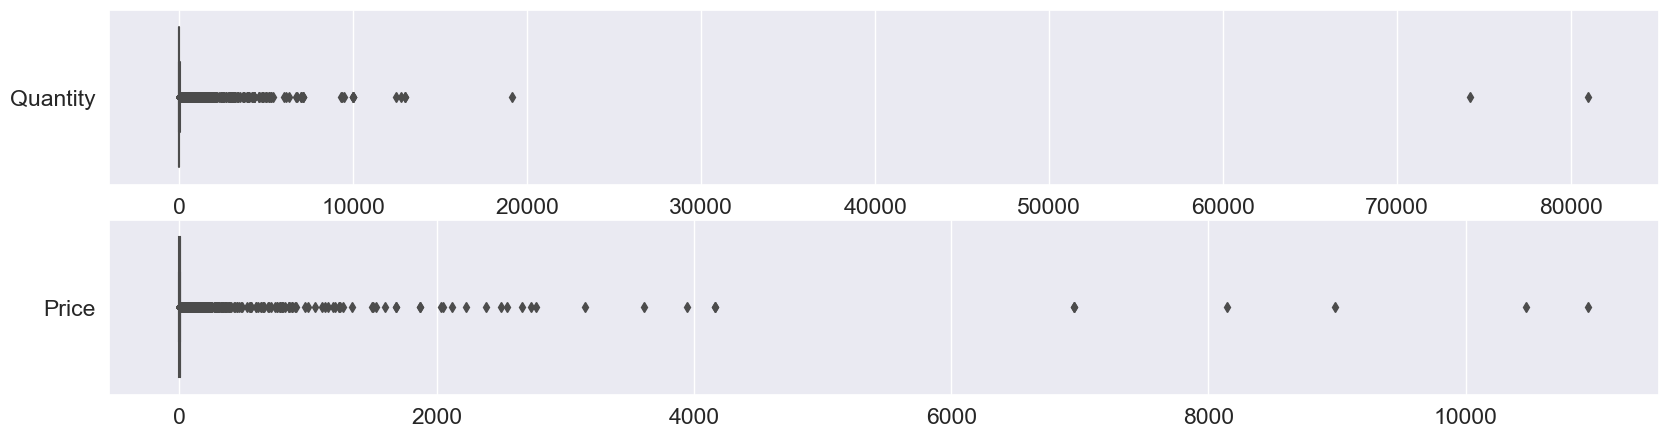

In [49]:
column = ['Quantity', 'Price']
fig, axes = plt.subplots(2,1, figsize = (20,5))
for i, c in enumerate(column):
    sns.boxplot(data = data[[c]], ax = axes[i], orient = 'h', color = 'red')

In [50]:
# Aplly the funtion to remove outlier
replace_with_thresholds(data, "Quantity")
replace_with_thresholds(data, "Price")

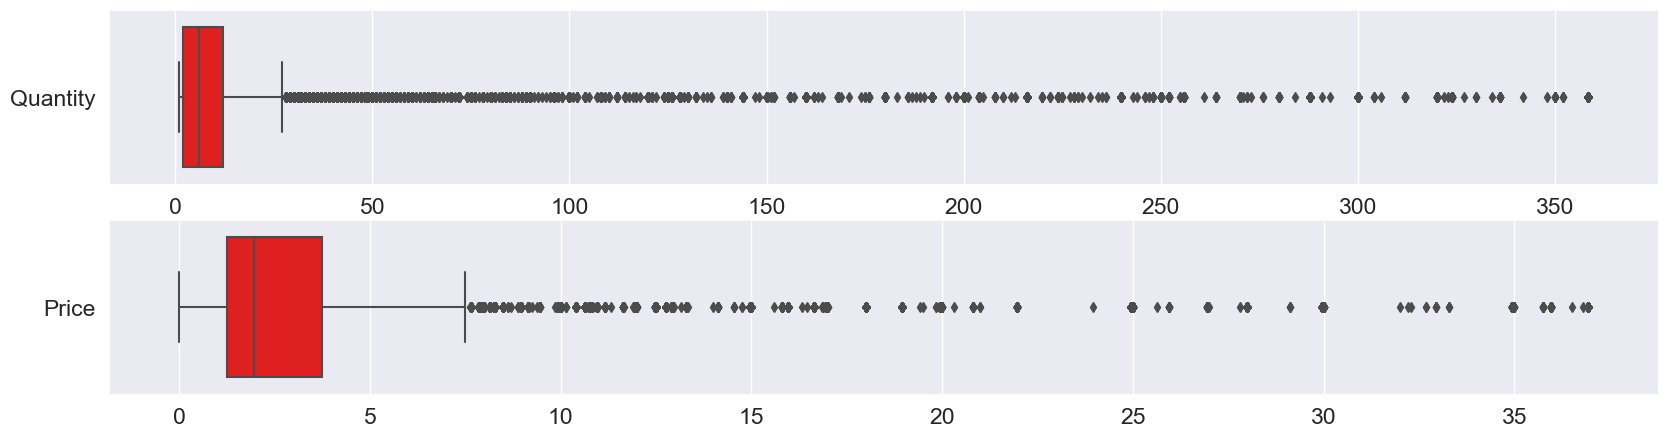

In [51]:
column = ['Quantity', 'Price']
fig, axes = plt.subplots(2,1, figsize = (20,5))
for i, c in enumerate(column):
    sns.boxplot(data = data[[c]], ax = axes[i], orient = 'h', color = 'red')

In [52]:
#Create RFM
Reference_day = data['InvoiceDate'].max() + pd.DateOffset(days = 1)
print(Reference_day)
RFM = data.groupby('Customer ID').agg({'InvoiceDate': lambda x: (Reference_day - x.max()).days,
                                      'Invoice': lambda x: x.nunique(),
                                      'Amount': lambda x: x.sum()})

2011-12-10 12:50:00


In [53]:
RFM['InvoiceDate'] = RFM['InvoiceDate'].astype('int')

RFM.rename(columns = {'InvoiceDate': 'Recency',
                    'Invoice': 'Frequency',
                    'Amount': 'Monetary'}, inplace = True)
RFM.describe()

,Recency,Frequency,Monetary
count,5878.000000,5878.000000,5878.000000
mean,201.331916,6.289384,2955.904095
std,209.338707,13.009406,14440.852688
min,1.000000,1.000000,2.950000
25%,26.000000,1.000000,342.280000
50%,96.000000,3.000000,867.740000
75%,380.000000,7.000000,2248.305000
max,739.000000,398.000000,580987.040000


In [54]:
RFM.head()

,Recency,Frequency,Monetary
Customer ID,,,
12346,326,12,77556.46
12347,2,8,4921.53
12348,75,5,2019.40
12349,19,4,4428.69
12350,310,1,334.40


### The Fourth varibale of RFM, InterPurchase Time, is a measure of average time gap between total shopping trips by a customer. The Interpurchase Time is calcluted as fallows :

- T = L/(F-1) = (Tn - T1)/(F-1)

- T --> Interpurchase Time
- L --> Shopping Cycle
- F --> Frequency
- T1 --> First purchase
- Tn --> Last purchase
- Note: We consider only those customers who made purchase more than once.

In [55]:
RFM = RFM[RFM['Frequency'] >  1]
RFM.head()

,Recency,Frequency,Monetary
Customer ID,,,
12346,326,12,77556.46
12347,2,8,4921.53
12348,75,5,2019.40
12349,19,4,4428.69
12352,36,10,2849.84


In [56]:
Shopping_Cycle = data.groupby('Customer ID').agg({'InvoiceDate': lambda x: (x.max() - x.min()).days})
Shopping_Cycle

,InvoiceDate
Customer ID,
12346,400
12347,402
12348,362
12349,570
12350,0
...,...
18283,654
18284,0
18285,0


In [57]:
RFM['Shopping_Cycle'] = Shopping_Cycle
RFM.head()

,Recency,Frequency,Monetary,Shopping_Cycle
Customer ID,,,,
12346,326,12,77556.46,400
12347,2,8,4921.53,402
12348,75,5,2019.40,362
12349,19,4,4428.69,570
12352,36,10,2849.84,356


In [60]:
RFM['Interpurchase_Time'] = RFM['Shopping_Cycle'] // (RFM['Frequency'] - 1)
RFMT = RFM[['Recency', 'Frequency', 'Monetary', 'Interpurchase_Time']]
RFMT.head()

,Recency,Frequency,Monetary,Interpurchase_Time
Customer ID,,,,
12346,326,12,77556.46,36
12347,2,8,4921.53,57
12348,75,5,2019.40,90
12349,19,4,4428.69,190
12352,36,10,2849.84,39


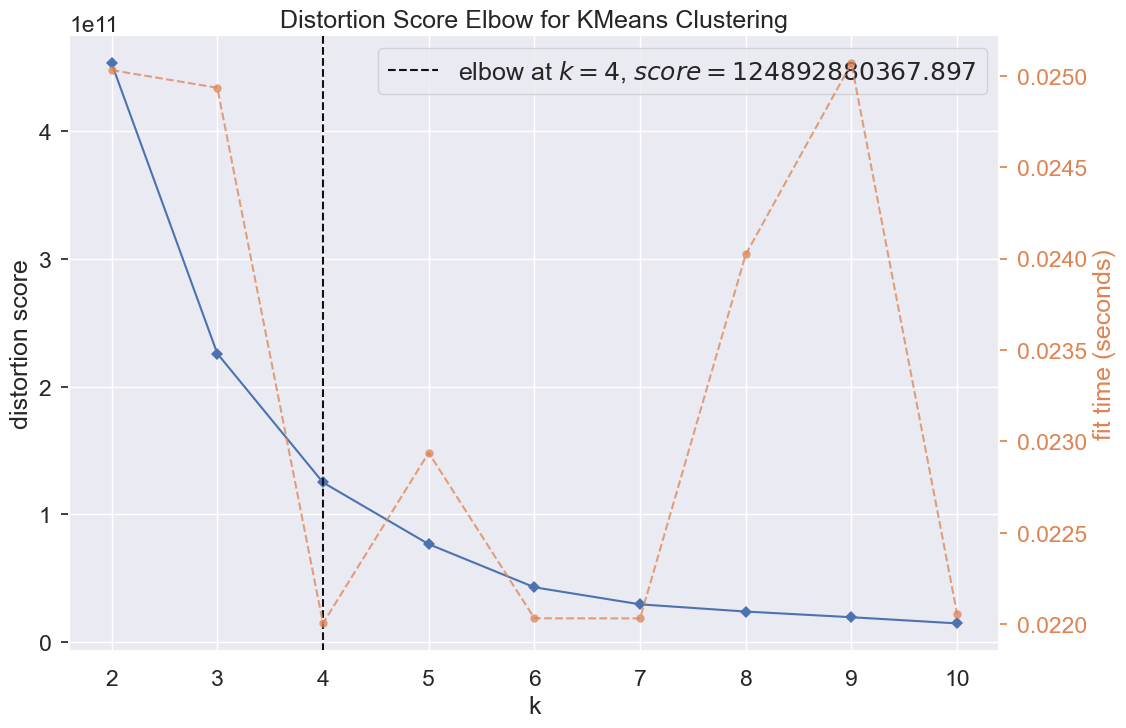

In [70]:
plt.figure(figsize = (12,8))

Elbow_M = KElbowVisualizer(KMeans(), k = 10)
Elbow_M.fit(RFMT)
Elbow_M.show();

In [71]:
# K = 4
model = KMeans(n_clusters=4, init="k-means++", n_init = 10, max_iter = 300, random_state = 101)
model.fit(RFMT)

KMeans(n_clusters=4, n_init=10, random_state=101)

In [76]:
RFMT['Cluster'] = model.labels_
RFMT.head()

,Recency,Frequency,Monetary,Interpurchase_Time,Cluster
Customer ID,,,,,
12346,326,12,77556.46,36,2
12347,2,8,4921.53,57,0
12348,75,5,2019.40,90,0
12349,19,4,4428.69,190,0
12352,36,10,2849.84,39,0


In [80]:
model.cluster_centers_

array([[1.43990467e+02, 7.28431840e+00, 2.68379552e+03, 1.03002622e+02],
       [6.87500000e+00, 1.11625000e+02, 2.09686235e+05, 3.31250000e+01],
       [5.63673469e+01, 7.33061224e+01, 5.64540056e+04, 1.41836735e+01],
       [1.50000000e+00, 1.48000000e+02, 5.54794780e+05, 4.50000000e+00]])

In [81]:
model.cluster_centers_[:,0]

array([143.99046711,   6.875     ,  56.36734694,   1.5       ])

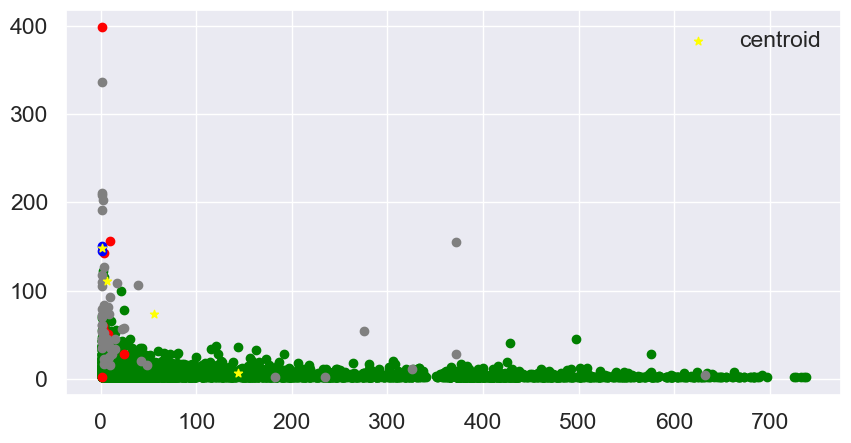

In [85]:
# grouping the data in accorandance with each cluster seperately
one = RFMT[RFMT["Cluster"]==0]
two = RFMT[RFMT["Cluster"]==1]
three = RFMT[RFMT["Cluster"]==2]
four = RFMT[RFMT["Cluster"]==3]

#Checking the quality of clustering in the data set
plt.figure(figsize=(10,5))

plt.scatter(one["Recency"],one["Frequency"],color='green')
plt.scatter(two["Recency"],two["Frequency"],color='red')
plt.scatter(three["Recency"],three["Frequency"],color='grey')
plt.scatter(four["Recency"],four["Frequency"],color='blue')
plt.scatter(model.cluster_centers_[:,0],model.cluster_centers_[:,1],color="yellow",marker="*",label="centroid")
plt.legend()
plt.show()

In [88]:
print("Silhouette score :",silhouette_score(RFMT, model.labels_, metric='euclidean'))

Silhouette score : 0.9301991867148273
